# Applied Artificial Intelligence - Lab 4, Training and evaluating a neural network to recognize handwritten digits.

Luca van Straaten - 18073611

**System information**: 2018 Intel Core i7 13-inch MacBookPro15,2, 16GB RAM, 512GB SSD, macOS Ventura 13.0 (22A380), kernel 22.1.0

This file, along with the rest of the labs, are tracked in a git repository on github. [lab 4](https://github.com/lucanatorvs/Applied_Artificial_Intelligence_Lab/blob/main/4/lab4.ipynb)

The goal of this assignment is to build and train a Neural Network that can recognize handwritten digits from 0 to 9. You can use the following code to download the MINIST data of handwritten digits.


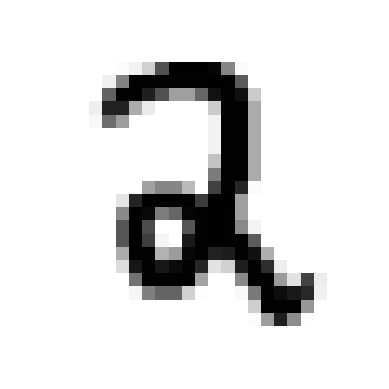

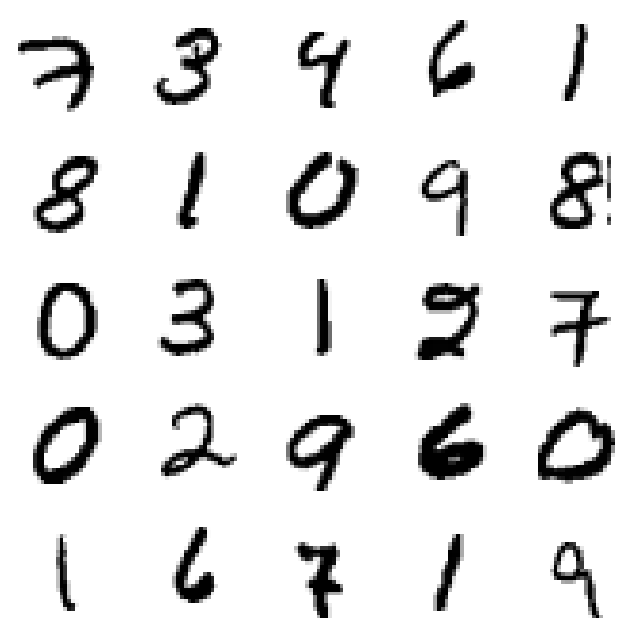

In [57]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_full.shape

# test a random image
def plot_digit(image):
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

some_image = random.randint(0, X_train_full.shape[0])
some_digit = X_train_full[some_image,:,:]
plot_digit(some_digit)

# rescaling and separating a validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# plot the first 25 images
plt.figure(figsize=(8,8))
for index, image in enumerate(X_train[:25]):
    plt.subplot(5,5,index+1)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

*You need to perform the following steps:*

## 1.

Train a neural network model using only one inner dense layer of 10 units . Choose the correct input and output layers. Investigate the model using learning rates of 0.01 and 0.1 and a ReLU activation function. Train your model for 100 epochs and plot learning curves for the training and validation set for each combination of above parameters. You can refer to chapter 10 for help.


In [58]:
def Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid):
    # layes is a 2d array with the number of neurons in each layer and the activation function
    # learning_rate is the learning rate
    # epochs is the number of epochs
    # X_train is the training set
    # y_train is the training labels
    # X_valid is the validation set
    # y_valid is the validation labels

    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for layer in layers:
        model.add(keras.layers.Dense(layer[0], activation=layer[1]))
    model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=learning_rate),
                metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
    return history


In [59]:

# one inner dense layer of 10 units learning rate of 0.01 and 100 epochs
layers = [[10, "softmax"]]
learning_rate = 0.01
epochs = 100
history1 = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)

# one inner dense layer of 10 units learning rate of 0.1 and 100 epochs
layers = [[10, "softmax"]]
learning_rate = 0.1
epochs = 100
history2 = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)

# one inner dense layer of 10 units with ReLU, learning rate of 0.01 and 100 epochs
layers = [[10, "relu"]]
learning_rate = 0.01
epochs = 100
history3 = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)


Epoch 1/100
1719/1719 [==============================] - 2s 882us/step - loss: 0.7926 - accuracy: 0.8142 - val_loss: 0.5017 - val_accuracy: 0.8758
Epoch 2/100
1719/1719 [==============================] - 2s 931us/step - loss: 0.4667 - accuracy: 0.8793 - val_loss: 0.4131 - val_accuracy: 0.8874
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4114 - accuracy: 0.8895 - val_loss: 0.3761 - val_accuracy: 0.8970
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3839 - accuracy: 0.8951 - val_loss: 0.3549 - val_accuracy: 0.9044
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3663 - accuracy: 0.8988 - val_loss: 0.3404 - val_accuracy: 0.9064
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3538 - accuracy: 0.9025 - val_loss: 0.3308 - val_accuracy: 0.9084
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3445 - accuracy: 0.9040 - val_loss: 0.3225 - va

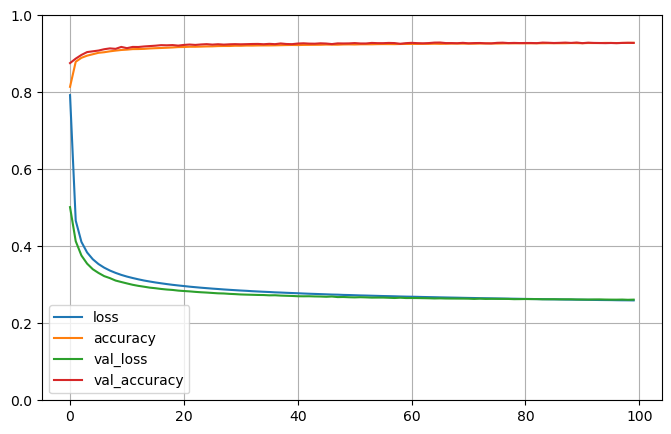

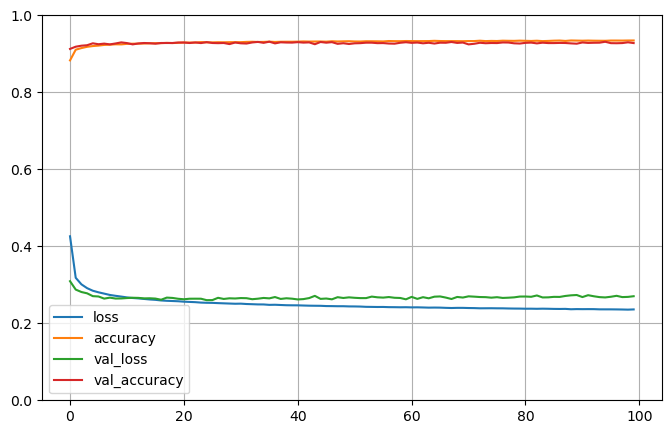

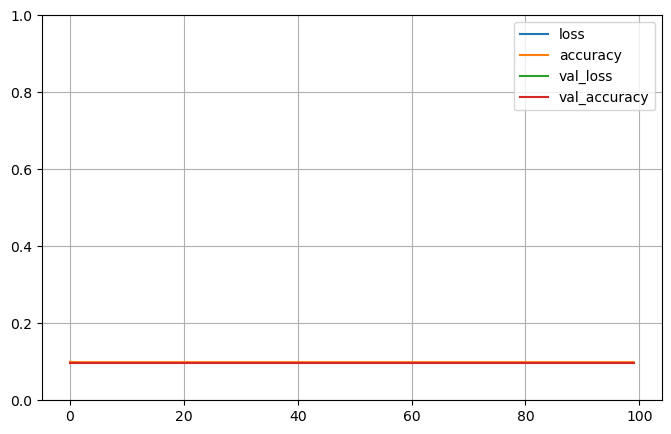

In [60]:

# print all the hysteries with a for loop
histories = [history1, history2, history3]
for history in histories:
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()




**Question 1**: From each learning curve draw your conclusions about the performance of your model based on the above parameters? Is your model overfitting or underfitting?

**Answer 1**: The model is not overfitting. The validation loss is decreasing and the validation accuracy is increasing. The training loss is also decreasing and the training accuracy is increasing.


## 2

Repeat the step 1 for the following cases:

- **a**. one inner dense layer of 50 units
- **b**. one inner dense layer of 100 units
- **c**. two dense layers of 10 and 10 units
- **d**. two dense layers of 50 and 50 units
- **e**. two dense layers of 100 and 50 units
- **f**. two dense layers of 100 and 100 units

From each learning curve draw your conclusions about the performance of your model based on the above parameters? Is your model overfitting or underfitting? Is there anything else you can suggest to change which could have a positive effect on the performance of the above model?


In [61]:
epochs = 100
learning_rate = 0.01

print ("A, one inner dense layer of 50 units")
layers = [[50, "softmax"]]
history1 = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)

print ("B, one inner dense layer of 100 units")
layers = [[100, "softmax"]]
history2 = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)

print ("C, two dense layers of 10 and 10 units")
layers = [[10, "relu"], [10, "softmax"]]
history3 = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)

print ("D, two dense layers of 50 and 50 units")
layers = [[50, "relu"], [50, "softmax"]]
history4 = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)

print ("E, two dense layers of 100 and 50 units")
layers = [[100, "relu"], [50, "softmax"]]
history5 = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)

print ("F, two dense layers of 100 and 100 units")
layers = [[100, "relu"], [100, "softmax"]]
history6 = Train_neural_network(layers, learning_rate, epochs, X_train, y_train, X_valid, y_valid)

A, one inner dense layer of 50 units
Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8862 - accuracy: 0.8097 - val_loss: 0.5042 - val_accuracy: 0.8748
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4733 - accuracy: 0.8783 - val_loss: 0.4125 - val_accuracy: 0.8912
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4153 - accuracy: 0.8892 - val_loss: 0.3753 - val_accuracy: 0.8998
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3867 - accuracy: 0.8947 - val_loss: 0.3541 - val_accuracy: 0.9062
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3685 - accuracy: 0.8995 - val_loss: 0.3400 - val_accuracy: 0.9072
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3558 - accuracy: 0.9023 - val_loss: 0.3293 - val_accuracy: 0.9110
Epoch 7/100
1719/1719 [==============================] - 2s 997us/step - loss: 0.3461 - accur

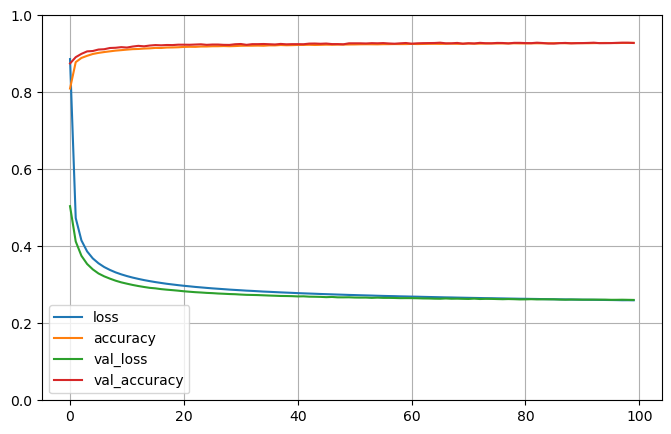

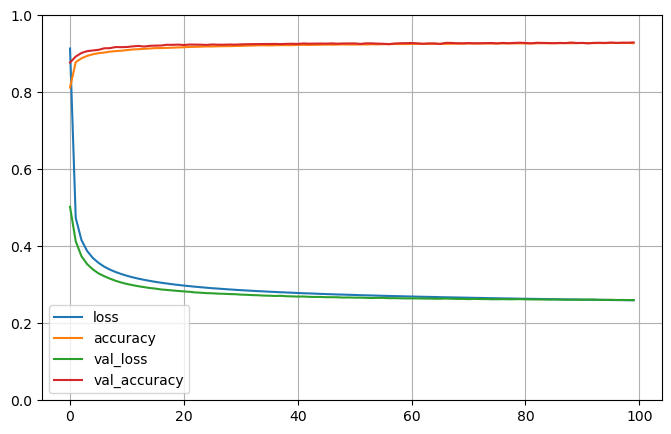

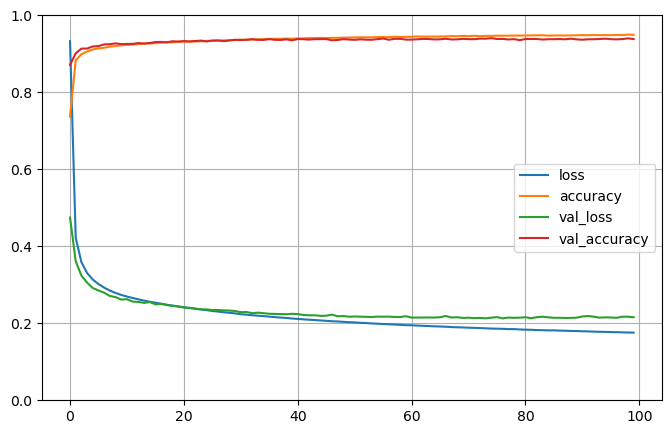

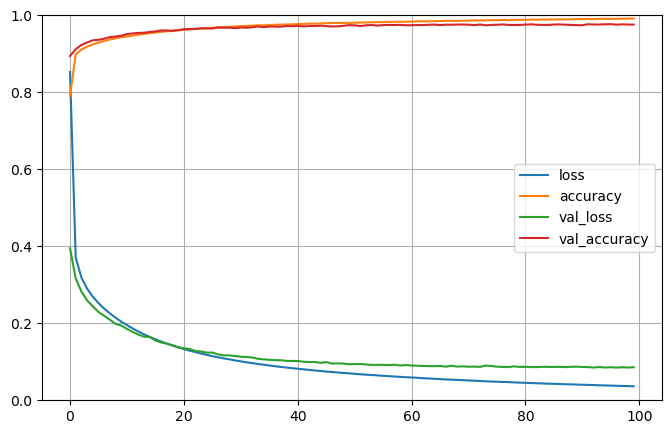

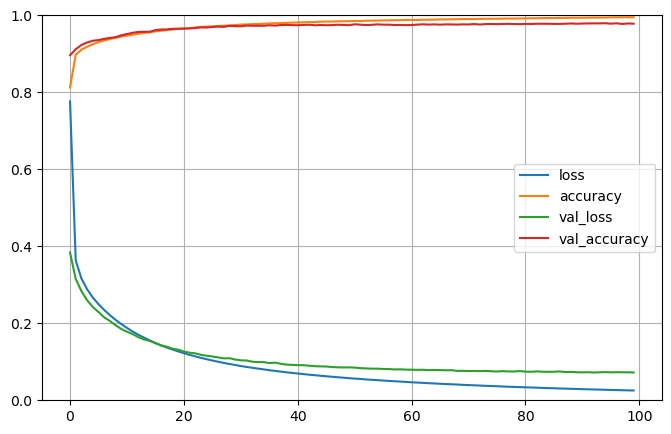

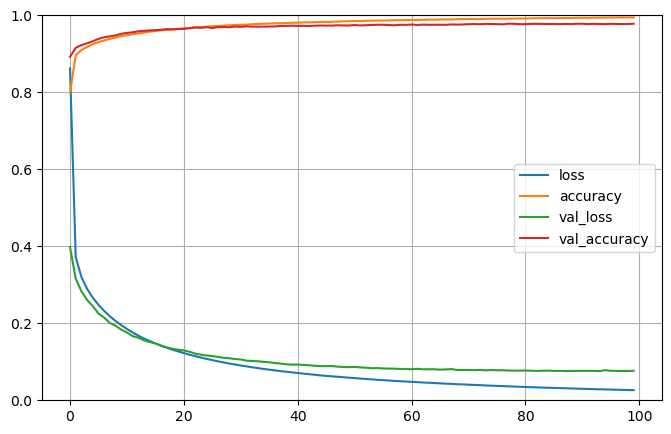

In [62]:
# print all the hysteries in a grid with a for loop
histories = [history1, history2, history3, history4, history5, history6]
for history in histories:
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

## 3

Draw an overall conclusion from the above steps. Which model and parameters you think are the best choice to recognize handwritten digits? Explain with reasoning. 

**Answer 3a**: model B, one inner dense layer of 100 units is best becouse the val accuracy is close to the accuracy and the val loss is close to the  loss. This means that the model is not overfitting and is not underfitting.

Take this final model and evaluate it on the test set

In [63]:
# evaluate the model on the test set

print ("F, two dense layers of 100 and 100 units")

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
            optimizer=keras.optimizers.SGD(lr=0.01),
            metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)

F, two dense layers of 100 and 100 units
Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8536 - accuracy: 0.7981 - val_loss: 0.3938 - val_accuracy: 0.8950
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3736 - accuracy: 0.8956 - val_loss: 0.3169 - val_accuracy: 0.9146
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3237 - accuracy: 0.9083 - val_loss: 0.2854 - val_accuracy: 0.9224
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2952 - accuracy: 0.9160 - val_loss: 0.2635 - val_accuracy: 0.9298
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9225 - val_loss: 0.2462 - val_accuracy: 0.9322
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2548 - accuracy: 0.9280 - val_loss: 0.2292 - val_accuracy: 0.9374
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2387 - acc

[14.827378273010254, 0.9725000262260437]

1/1 [==============================] - 0s 85ms/step


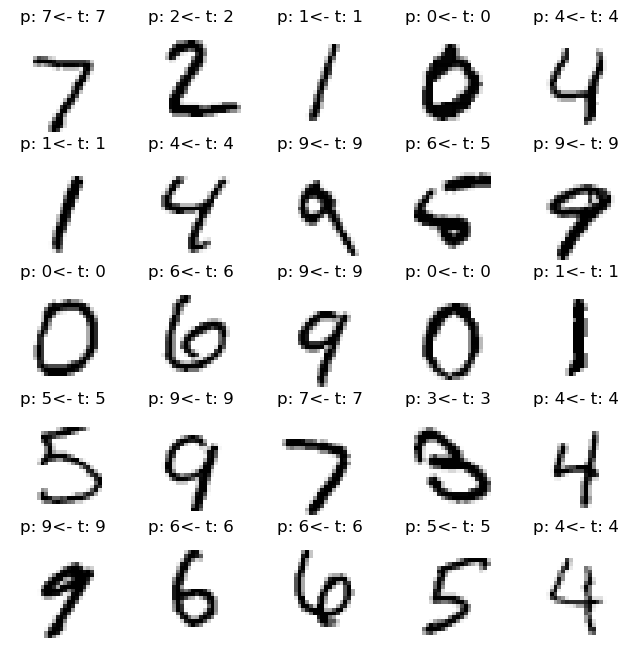

In [64]:
# plat a grid of images with their predictions and the true labels

X_new = X_test[:25]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=-1)

plt.figure(figsize=(8,8))
for index, image in enumerate(X_new):
    plt.subplot(5,5,index+1)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")
    plt.title("p: " + str(y_pred[index]) + "<- t: " + str(y_test[index]))

plt.show()
